# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [75, 183, 347]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  20398   1137        3    4407                 3           975
1  36847  43950    20170   36534               239         47943
2  27380   7184    12311    2809              4621          1022

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 
Three chosen samples leads to intuition which following establishments which may or may not be correct.
1. First sample looks like some kind of food shop or cafe as spending is more on Fresh, Frozen (a lot more around 150% than the average spending in those categories) and to fair amount on Delicatessen (around 63% of avaerage spending) and less on Milk (around 19% of average spending). They are almost close to nothing spending on grocery and Detergents_Paper.
2. Second sample looks like some kind of super market as spending on everything in quite a large number including grocery and Delicatessen. The spending is much higher (lot more than 100% of average spending) than the average spending in those categories. Detergents_Paper is very less number 8% of the average spneding in that category which might be ignored for this particular customer.
3. Third sample also look like some kind of retailer or family run business as spending looks very close to second sample. The difference is, spending in all items is less compare to second sample. They are also spending more than 100% than average spending in those categories except "Frozen" and "Delicatessen" which is 91% and 61% than the average spending respectively.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'], axis = 1, inplace = False)

target_col = data[['Grocery']]

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, target_col, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=10)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

0.695471477255


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature relevant for identifying a specific customer?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I choose "Grocery" feature for my prediction as the sample data "Grocery" seems to be feature where sets of customers are spending more and less both.

Reported prediction scores for "Grocery" feature is: 0.695471477255 which is pretty good score. This shows data is very well fits and prediction is very close to accuracy.

This feature is not rellevant for identifying a specific customer for following reason.
1. "Grocery" is not providing any extra information as this is used for prediction which is target data. Other data in feature set being used to predict "Grocery" value.
2. Usually data in feature set provides relevance for predicting any target value and "Grocery" is not included in feature set hence this cannot be consider as relevance data.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000

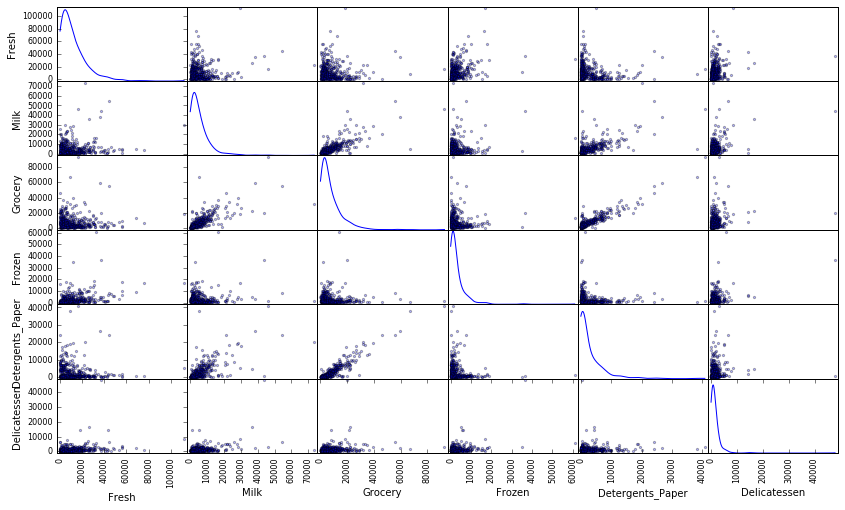

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
data.corr()

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
Yes. There are couple of following pair of features exhibit some degrees of correlation.

Milk-Grocery: Usually the correlation of the data makes positive or negative slope. In the plot above the data from Milk and Grocery is making a slope and all the data is around that slope so they are correlated to some degree.

Milk-Detergents_Paper: Usually the correlation of the data makes positive or negative slope. In the plot above the data from Milk and Detergents_Paper is making a slope and all the data is around that slope so they are correlated to some degree.

Grocery-Detergents_Paper: Usually the correlation of the data makes positive or negative slope. In the plot above the data from Grocery and Detergents_Paper is making a slope and all the data is around that slope so they are correlated to some degree.

Yes. This confirms the relevance of the feature I attempted to predict. Based on my intuition above, Grocery is irrelevant feature in this dataset. Here correlation between Milk-Grocery and Grocery-Detergents shows that we can combine these to one new feature and use that feature instead of using actual data.

Data for Milk-Grocery, Milk-Detergents_Paper, and Grocery-Detergents_Paper are distributed around a slope which is showing some kind of correlation.

All other data except above are kind of skewed data mostly skewed right. Since data is not normally distributed, it will be good idea to apply some kind of scaling. A simple approach would be applying a natural logarithm.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

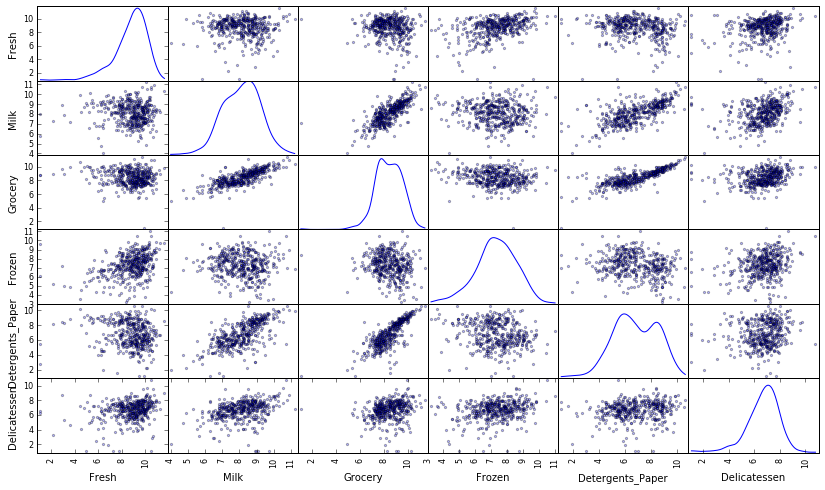

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

Fresh       Milk   Grocery     Frozen  Detergents_Paper  Delicatessen
0   9.923192   7.036148  1.098612   8.390949          1.098612      6.882437
1  10.514529  10.690808  9.911952  10.505999          5.476464     10.777768
2  10.217568   8.879612  9.418248   7.940584          8.438366      6.929517

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [8]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
There are multiple data points presents in more than one feature.
1. Index 65 data point presents in both "Fresh" and "Frozen"
2. Index 66 data point presents in both "Fresh" and "Delicatessen"
3. Index 128 data point presents in both "Fresh" and "Delicatessen"
4. Index 154 data point presents in all "Milk", "Grocery" and "Delicatessen"
5. Index 75 data point presents in both "Grocery" and "Detergents_Paper"

In this scenario outlier may impact prediction so we should remove outlier both which is presents in multiple features and which is presents in only one feature as well.

Removing of outliers is controversial but here are couple of condition where outliers may be removed.
1. If outliers doesnot change is result but does affect the prediction, we may remove outlier.
2. If outliers affects both result and prediction, we should remove outlier.

Cleaning outliers could be useful here, since it would remove noise which is more prevelent in low-variance components. But it would also remove some data points that could make the potenttial cluster.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. 

In the code block below, you will need to implement the following:
 - Import `sklearn.preprocessing.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

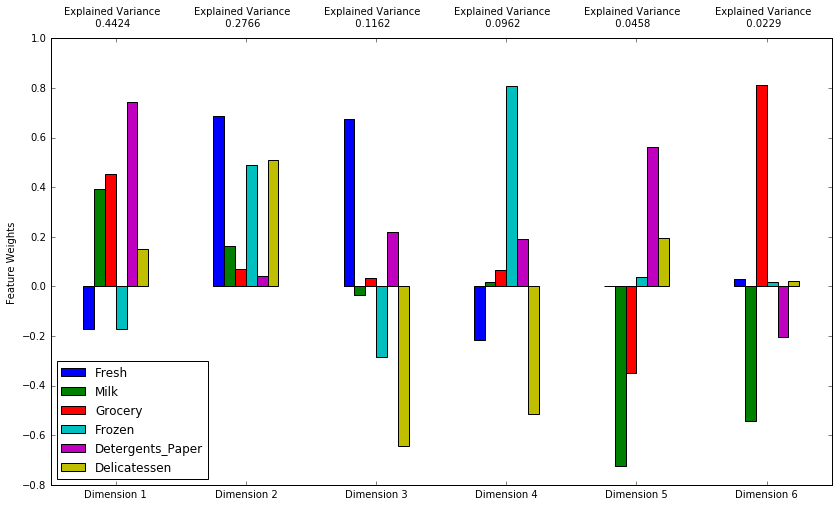

In [9]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
- How much variance in the data is explained* ***in total*** *by the first and second principal component?

Answer: Variance in the data by First principal component is: 0.4424
Variance in the data by Second principal component is: 0.2766

In our example, the first and second principal components explained total: 71.90 % of the variance in the data.

PCA organize its output in terms of explained variance, i.e. the fraction of variance in the data explained by the relationships encoded in each principal component. So we know that the first pricipal component explains more of the variance than any other, the second component more than any other but the first and so on down the line.

- What about the first four principal components?

Answer: In our example, the first four principal components account for total 93.14% of the variance in the data. The first 4 principal components 44.24%, 27.66%, 11.62% and 9.62% of the variance in the data respectively. The first two principal components accounts for around 72% of the variance in data and after that next two principal components contribute around 20% of the varaince in data. This explains first two principal components are most important components to analyze customer spending and then next two principal compnents contribute little bit but last two components contribute only less than 7% of the variance in data which can be easily ignored.

- Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.

Answer: Here are some thought process regarding first four dimensions based on visualization provided above.

The Dimensions represent eigen vectors and the directions along the variation of the data. PCA begins by converging to the center of the dataset and projects its axes along the spread of the data.
Positive weights indicate a variable and a principal component are positively correlated: an increase in one results in an increase in the other. Negative weights indicate the reverse, a negative correlation. Large (either positive or negative) weights indicate that a variable has a strong effect on that principal component, so we want to find those large weights, so we need a criterion of what constitutes a “large” weights. Because the sum of the squares of all weights for an individual principal component must sum to one, we can calculate what the weigths would be if all variables contributed equally to that principal component. Any variable that has a larger weights than this value contributes more than one variable’s worth of information and would be regarded as an important contributor to that principal component.

Dimension 1: This Dimension is much more a composite of multiple features. This represents that customers that buy more "Detergents_Paper" items also tend to buy more "Grocery" and "Milk" items as well and very less likely to buy "Frozen" and "Fresh" items. We can use this discovery to encourage our wholesale distributor client to try to increase sales by marketing these items in a synergistic fashion, and to reduce costs by bundling/delivering them together.

Dimension 2: This dimension represents the customers who buy more "Fresh" items also buy "Delicatessen" and "Frozen" items as well. So we can use this discovery to encourage our wholesale distributor client to try to increase sales by marketing these items in a synergistic fashion, and to reduce costs by bundling/delivering them together.

Dimension 3: This dimension represents the customers who buy more "Fresh" and some "Detergents_Paper" items are very less likely to buy or may not buy "Delicatessen" and "Frozen" items. There is another representation of this dimension that the customers who buys "Delicatessen" and "Frozen" items together may not buy "Fresh" and "Detergents_Paper". So we can use this discovery to encourage our wholesale distributor client to try to increase sales by marketing these items in a synergistic fashion, and to reduce costs by bundling/delivering them together.

Dimension 4: This dimension represents the customers who buy more "Frozen" and little "Detergents_Paper" items are very less likely to buy or may not buy "Delicatessen" and "Fresh" items. There is another representation of this dimension that the customers who buys "Delicatessen" and "Fresh" items together may not buy "Frozen" and "Detergents_Paper". So we can use this discovery to encourage our wholesale distributor client to try to increase sales by marketing these items in a synergistic fashion, and to reduce costs by bundling/delivering them together.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [10]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -8.3665       0.5353      -1.0888      -1.0634       0.2159   
1       0.4585       5.3459      -2.6856      -0.0173      -2.1850   
2       1.6462       1.7255       1.0160       0.4519       0.1195   

   Dimension 6  
0      -4.1768  
1       0.2688  
2       0.1095

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [14]:
# TODO: Fit PCA to the good data using only two dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -8.3665       0.5353
1       0.4585       5.3459
2       1.6462       1.7255

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
Here are the advantages to using K-Means and Gaussian Mixture Model (GMM)

K-Means
- K Means clustering works if the number of clusters in the data is already known.
- It also scales well to large numbers of samples and has been demonstrated to work in many different fields.
- Because of the known number of clusters, K Means is often very fast in determining which sample is in which cluster.
- KMeans clusters are hard clusters, as in a data point exists in a single cluster only.

Gaussian Mixture Model (GMM)
- Typically identity the dominant patterns well.
- They also have well-studied statistical inference models available, and it's also possible to determine the density of each cluster.
- These models also can determine the covariance of different features in the data.
- GMM clusters can also be soft clusters whereby a point in the data could conceivably be part of multiple clusters.

For the wholesale customer dataset I will choose GMM approach because it visualizes the plot better. Whereas K means would draw straight edges between the clusters and put the clump on the bottom right into a box, GMM puts them into ellipses along the x axis and y axis which is more intuitive, given that the data on the most bottom right part could be either one of those groups.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [16]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

clusterer = GMM(n_components = 3)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print score

0.375222595239


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

Following are the several clusters I tried and their respective scores.
- n_components = 2, Silhouette score = 0.314641043336
- n_components = 3, Silhouette score = 0.375222595239
- n_components = 4, Silhouette score = 0.356401755466
- n_components = 5, Silhouette score = 0.257867358339
- n_components = 6, Silhouette score = 0.257248942499
- n_components = 7, Silhouette score = 0.310819287502
- n_components = 9, Silhouette score = 0.331882234164
- n_components = 10, Silhouette score = 0.328306314186

The best score 0.375222595239 comes with 3 clusters.

Less than 3 clusters has less score because they becomes very simple. More than 3 clusters become more complex for this datasets and score is going down. Even more than 6 clusters are kind of fluctuating in score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

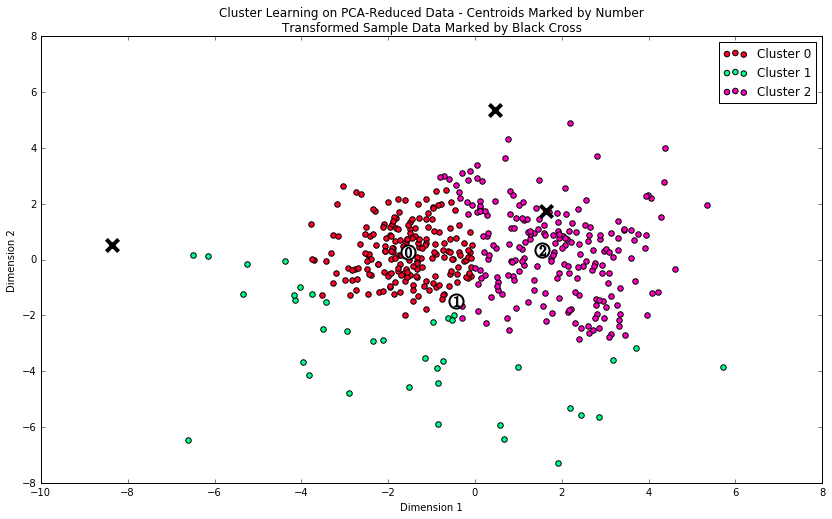

In [17]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [22]:
# TODO: Inverse transform the centers
#from sklearn.decomposition import PCA

#pca = PCA(n_components = 2)
#pca.fit(good_data)
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

print 'Average spending of category:'
print data.mean()

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Average spending of category:
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   9809  1924     2354    2216               286           721
Segment 1   2414  2226     3429     775               601           345
Segment 2   6047  6541     9557    1353              2830          1184

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

The original problem that our wholesale distributor client has was that when they adjusted their delivery schedule, smaller customers complained that it did not suit their schedule. But the larger customers had no issue with the new delivery system.

Now that we have demonstrated a method of categorizing our client's customers based on what they purchase and how much of it, we can propose modifications and improvements to our client's delivery and marketing strategies that are tailored to a customer group.

Here are the establishments could each segments represent-
- Segment 2 represents the segment of the customer whoose spending is in everything in good amount and total spending is much higher than other segment of the customers. It looks like this customer belongs to some super markets or similar to that. These kind of customers might have better equipment and facilities to cater to cheaper evening delivery as compared to smaller family run businesses. This might be the reason there were no complain from large customer.
       Another observation in Segment 2 is, Spending in "Fresh", "Frozen" and "Delicatessen" is below the average spending in these categories respectively (12000, 3071, and 1524) though spending is still higher than any other segment. Spending in "Milk", "Grocery" and "Detergents_Paper" is higher than the average spending in these categories respectively (5796, 7951, and 2881). It looks like this type of customer is more focused on selling "Milk", "Grocery", and "Detergents_Paper" than any other items which leads to some kind of retail shop specialized selling those categories. So wholesale distributor might want to offer promotion considering this fact.
- Segment 1 represents the segment of the customer whoose spending is in "Fresh", "Milk" and "Grocery" in fair amount compare to others and their total spending is lower than any other segment of the customers. It looks like this customer belongs to some retail shops or family run business. This type of customers might not have equipment or facility to cater evening delivery. They might still consider previous delivery method. Wholesle distributor might offer them some promotion by bundle or discount to move them to accept 3 days delivery or change in delivery compare to original delivery method.
        Another observation in Segment 1 is, Spending in "Milk", and "Grocery" is almost close to 40% of the average spending in these categories respectively (5796 and 7951). Spending in other categories is much lower around 20% of the average spending in these categories. It looks like this type of customer is more focused on selling "Milk", and "Grocery" than any other items which leads to some kind of retail shop specialized selling those categories. So wholesale distributor might want to offer promotion considering this fact.
- Segment 0 represents the segment of the customer whoose spending is in "Fresh", and "Frozen" and they also buy fair amount of "Milk" and "Delicatessen" too and their total spending is in middle of all three segments. It looks like this customer belongs to some food shop, restaurant or something similar to that. This type of customers might not have equipment or facilities to cater evening delivery. Based on their spending they might be interested in change of delivery if wholesale distributor offer them some kind promotion or bundle. They might be interested in morning delivery as they more focus on "Fresh", "Frozen" and "Grocery" along with "Milk" and "Delicatessen". It might be easier for them to receive them in morning. Wholesale distributor might want to offer them some promotion which allow them to recieve change in delivery.
        Another observation in Segment 0 is, Spending in "Fresh", and "Frozen" is 80% and 72% respectively of the average spending in these categories (12000 and 3071). Spending in "Delicatessen" is 47% , "Milk" is 33%, and "Grocery" is 30% of the average spending in these categories respectively (1524, 5796, and 7951). It looks like this type of customer is more focused on selling "Fresh", and "Frozen" than any other items which leads to some kind of food shop. So wholesale distributor might want to offer promotion considering this fact.


Here are the establishments of the cluster based on the customer segments-
- A customer who is assigned to Cluster '0' should best idetify with the eastablishments represented by the feature set of Segment '0' defined above.
- A customer who is assigned to Cluster '1' should best idetify with the eastablishments represented by the feature set of Segment '1' defined above.
- A customer who is assigned to Cluster '2' should best idetify with the eastablishments represented by the feature set of Segment '2' defined above.


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [31]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 2
Sample point 2 predicted to be in Cluster 2


**Answer:**

Based on my analysis in question 8,
- Sample point 0 represents to Segment 1, who appears to be retail shops or family run business and their total spending is low in compare to any other segments.
- Sample point 1 represents to Segment 2, who appears to be large customer and their total spending is much higher.
- Sample point 2 represents to Segment 2, who appears to be large customer and their total spending is much higher.

After verifying with sample data, the prediction looks very consistent with the cluster analysis.


## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

Now that we have three market segements, we can perform A/B tests in the respective segments. Thus, we can define our control and experiment group within the market segments without affecting the other segment. This is important as large volume customers might have better equipments and facilities to cater to cheaper evening delivery as compared to smaller family run businesses. If we do not segment the cutomers, one of the segments could overpower the other resulting in anomalous conclusions.

Since we now have different segments, we can perform the A/B test and calculate the variant for the resulting tests. If vairant is greater than what we consider significant, we can go ahead and implement the change. Thus,we would have favourable results from the delivery experiments.

The company can use this technique to find segments of customers that purchase a certain kind of product, say frozen foods. They can then craft various marketing initiatives, such as a wholesale discount, to A/B test on the different segments and observe the impact. If a particular change shows promise, they can be implement to select segments thereby creating and catering to their market niches.

### Question 11
*Assume the wholesale distributor wanted to predict some other feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*

**Answer:**
Effectively I would look for changes in the data over time (trends). Examples could be:
1. I could look at whether any customers started to move towards the boundary between the segments, as this may suggest they are growing (or not!).
Now that we have an initial clustering, we can label each customer against it's current customer segment. This can be done in GMM using labels = gmm_model.fit_predict(reduced_data) and in KMeans using labels = clusters.labels_. We can then use supervised learning models against the data in subsequent tests. If customers started to move towards another cluster, we would see an increase in training or testing errors.
2. I could also look at whether the mix of products changes, so for example whether another category starts to gain traction with a set of customers.
Using a similar label as above (eg the cluster number), a supervised learner would determine the mix of categories that made up each of the segments. We would be able to determine changes to this based on training the model using the known data and then testing the model over a period of time which changes to it. I expect that we would see an increase in errors as the mix of categories changes. We can verify that our model is working this way. However, if most of the new points are outliers in our model, we would need to recompute.

Given the quantity of various items of a future customer, its suitable label and hence other attributes, like best delivery mechanism can be predicted.

For a new store, first step would be to identify what is the primary product that store buys. Using a classification model, we can use this info to map store to customer segment, and use that to predict other trends associated with the stores of that type.

We can then train supervised regression algorithms to predict the purchase units of items.

For example, if there is a new store that is only purchasing Grocery, Fresh, Frozen, Detergent_Paper, and Delicacies.
Using this data and our trained classificaiton and regression models, we can predict its requirement of Milk based on the customer segment that customer belongs to.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

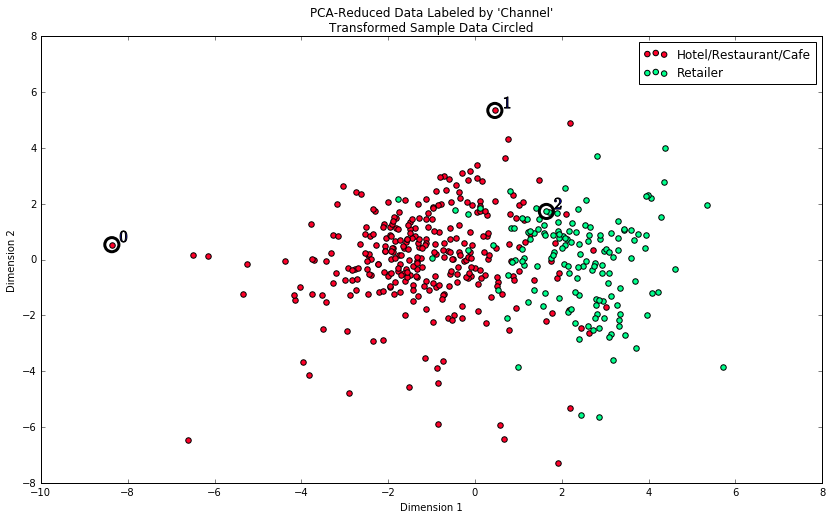

In [32]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

For this wholesale customer dataset I have chosen GMM approach because it visualizes the plot better. Whereas K means would draw straight edges between the clusters and put the clump on the bottom right into a box, GMM puts them into ellipses along the x axis and y axis which is more intuitive, given that the data on the most bottom right part could be either one of those groups.

I have chosen three clusters fro my analysis which is clustering the dataset into "Retail", "Hotel/Restaurant/Cafe" and some "Super Market (Who buys everything in fairly large quantity)". The customer distribution of the cluster I have chosen is very much align with this Hotel/Retaurant/Cafe and Retail customers distribution. The only difference is there is one more cluster which separated dataset for "Super Market" as well.

Two of the Three clusters from analysis classified purely as "Retail" and "Hotel/Restaurant/Cafe". In my analysis, I called them "Retail" and "Food Shop".

- Cluster 2 was interpreted to be super market or large customer. In the final visualization, Cluster 2 was represented by some Retail and some Hotels/Cafe
- Cluster 1 was interpreted as Retail shop or family run business. It aligns with Hotel/Restaurant/Cafe in the final visualization
- Cluster 0 was interpreted as a Food shop or restuarant or cafe. In the final visualization , it also aligns with Hotel/Restaurant/Cafe.

There is inconsistent of the prediction and final visulization. E.g. Cluster 2 was interpreted as super markets while Cluster 1 was retailer, but it turned out Cluster 2 was retailer.

I guess one of the reason for this is in my analysis, I used 3 clusters which makes better separation of the data but in final visualization it uses only 2 clusters. I can see some of the data is marked wrongly as well. E.g. some of the data which seems to be retailer is marked as Hotel/Restaurant/Cafe and vice-a-versa.
So I argue that the final classification is not very consistent. My intution is to use 3 clusters for this datasets to separate out data cleanly.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.